In [145]:
from my_functions import*

In [146]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

In [147]:
#Set delta R values and number of events to plot

dr_min=0.0
dr_max=0.4

nmin1=0
nmax1=1500

nmin2=0
nmax2=5000

In [148]:
"""
Z->mumu any quality
"""

#Compute the isolation for Z->mu mu events
pt_events=MuonTree_Zmumu["muon_pt"].array()[nmin1:nmax1]
eta_events=MuonTree_Zmumu["muon_eta"].array()[nmin1:nmax1]
phi_events=MuonTree_Zmumu["muon_phi"].array()[nmin1:nmax1]

data1=ak.flatten(pt_events)
isolation =muon_isolation_all_events(MuonTree_Zmumu, eta_events, phi_events, dr_min, dr_max, [nmin1,nmax1], 300)
data2=ak.flatten(isolation)

ratio1=data2/data1

#Get the number of events with muons
not_empty_count1 = ak.sum(ak.num(pt_events) > 0)

#Compute the isolation for Zero Bias events
pt_events=MuonTree_ZeroBias["muon_pt"].array()[nmin2:nmax2]
eta_events=MuonTree_ZeroBias["muon_eta"].array()[nmin2:nmax2]
phi_events=MuonTree_ZeroBias["muon_phi"].array()[nmin2:nmax2]

data1=ak.flatten(pt_events)
isolation =muon_isolation_all_events(MuonTree_ZeroBias, eta_events, phi_events, dr_min, dr_max, [nmin2,nmax2], 1000)
data2=ak.flatten(isolation)

ratio2=data2/data1

#Get the number of events with muons
not_empty_count2 = ak.sum(ak.num(pt_events) > 0)


"""
Z -> mu mu vs ZeroBias offline QUALITY 0
"""

#Compute the isolation for Z->mu mu events
pt_events=quality_selector(MuonTree_Zmumu["muon_quality"].array(), MuonTree_Zmumu["muon_pt"].array(), 0)[nmin1:nmax1]
eta_events=quality_selector(MuonTree_Zmumu["muon_quality"].array(), MuonTree_Zmumu["muon_eta"].array(), 0)[nmin1:nmax1]
phi_events=quality_selector(MuonTree_Zmumu["muon_quality"].array(), MuonTree_Zmumu["muon_phi"].array(), 0)[nmin1:nmax1]

data1=ak.flatten(pt_events)
isolation =muon_isolation_all_events(MuonTree_Zmumu, eta_events, phi_events, dr_min, dr_max, [nmin1,nmax1], 300)
data2=ak.flatten(isolation)

ratio3=data2/data1

#Get the number of events with muons
not_empty_count3 = ak.sum(ak.num(pt_events) > 0)

#Since we are using the same data, we can just copy the ratio and the not_empty_count
ratio4=ratio2
not_empty_count4 =not_empty_count2



100%|██████████| 10/10 [01:10<00:00,  7.00s/it]


Only 21.265 % of the data has been selected
Only 21.265 % of the data has been selected
Only 21.265 % of the data has been selected


100%|██████████| 15/15 [01:16<00:00,  5.13s/it]


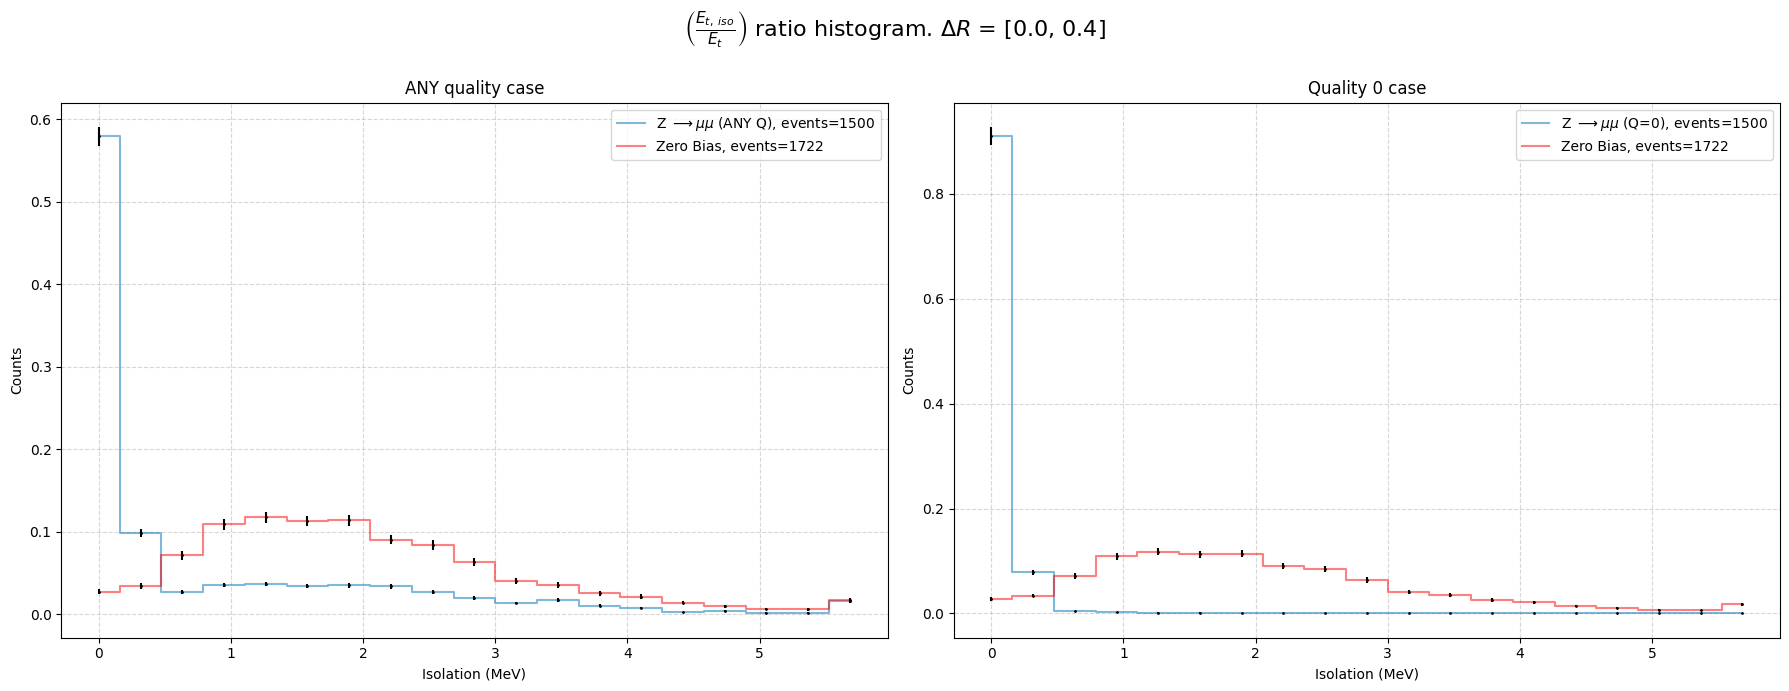

In [149]:
"""
I define this functions to plot everything more comfortably and as subplots
"""

def f(i,ax):
    #This line is used to set the axis to the current axis
    plt.sca(ax)
    
    if i==0:
        #Set the colors and labels for the plot
        colors=["#0072B2", "#FD0000"]
        labels=[fr"Z $\longrightarrow \mu \mu$ (ANY Q), events={not_empty_count1}",fr"Zero Bias, events={not_empty_count2}"]

        #Plot the data
        coolplot([ratio1,ratio2],
                        np.linspace(0,6,20),
                        colors,labels,
                        "Isolation (MeV)","Counts",
                "ANY quality case",
                plot_show=False)

    if i==1:
        #Set the colors and labels for the plot
        colors=["#0072B2", "#FD0000"]
        labels=[fr"Z $\longrightarrow \mu \mu$ (Q=0), events={not_empty_count3}",fr"Zero Bias, events={not_empty_count4}"]

        #Plot the data
        coolplot([ratio3,ratio4],
                        np.linspace(0,6,20),
                        colors,labels,
                        "Isolation (MeV)","Counts",
                "Quality 0 case",
                plot_show=False)

def f_subplots():
    # Plot as subplots
    fig, ax = plt.subplots(1, 2, figsize=(18, 7))
    
    ax=ax.flatten()
    #for each lower and upper limit, plot the data
    for i in [0,1]:
        f(i,ax[i])

    fig.suptitle(fr"$\left(\frac{{E_{{t,\;iso}}}}{{E_t}}\right)$ ratio histogram. $\Delta R$ = [{dr_min}, {dr_max}]",fontsize=16)  # Set the global title
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to leave space for suptitle
    plt.show()

f_subplots()